# 01. PyTorch Workflow

Resourcers:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
what_were_covering = {1: "Data(chuẩn bị dữ liệu)",
                      2: "Xây dựng model",
                      3: "Huấn luyện model với dữ liệu(training)",
                      4: "Dự đoán và đánh giá mô hình(Ìnerence)",
                      5: "Lưu và tải mô hình",
                      6: "Tổng kết"

}
what_were_covering

{1: 'Data(chuẩn bị dữ liệu)',
 2: 'Xây dựng model',
 3: 'Huấn luyện model với dữ liệu(training)',
 4: 'Dự đoán và đánh giá mô hình(Ìnerence)',
 5: 'Lưu và tải mô hình',
 6: 'Tổng kết'}

In [ ]:
import torch
from torch import nn #nn chứa tất cả những gì pytorch có để xây dựn 1 neutral network
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

# 1. Chuẩn bị dữ liệu

Data rất quan trọng trong Machine Learning, và nó có thể là rất nhiều loại

* Excel sheet
* Ảnh hoặc tương tự
* Videos
* Audio
* DNA
* Text

Machine Leaning là trò chơi gồm 2 phần
1. Biến data thành các biểu diễn số
2. Xây dựng 1 mô hình để học hỏi số data ở trên



In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim =1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

# Chia data ra thành các training set và test set

In [ ]:
#Tạo train/test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# 2. Tạo Model


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(7, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

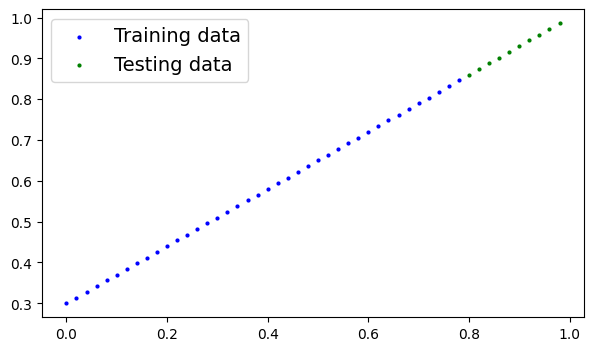

In [ ]:
plot_predictions();

In [ ]:
# Tạo 1 mô hình class hồi quy tuyến tính
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- tạo một số random weights (cách mà máy học)
                                                dtype=torch.float), # <- float32 là default
                                   requires_grad=True) # <- tối ưu kết quả bằng tự dộng đạo hàm

        self.bias = nn.Parameter(torch.randn(1),requires_grad=True)

    # Định nghĩa cách thức tính toán đầu ra dựa vào đầu vào
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- X : dữ liệu đầu vào
        return ((self.weights * x) + self.bias) # <- công thức cơ bản của hồi quy tuyến tính (y = w*X + b)

In [ ]:
# Vì weight và bias tạo random, nên sd seed để tạo ra 1 giá trị cố định mỗi lần chạy(giả ngẫu nhiên)
torch.manual_seed(42)

# subclass của nn.Module
model_0 = LinearRegressionModel()


print(list(model_0.parameters()))
print()
# List named parameters
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


# Tạo dự đoán sử dụng `torch.inference_mode()`


Để kiếm tra chúng ta có thể cho nó test data X_test và xem dộ chính xác mà nó dự đoán y_test.

Khi chúng ta ném data cho model, nó sẽ đi thẳng đến hàm `forward()` của model và cho ra kết quả sử dụng nhưng tính toán chúng ta đã xác định.

Hãy tạo một số dự đoán:

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  print(y_preds)

# Note: in older PyTorch code you might also see torch.no_grad()
# torch.inference_mode mới hơn, chạy nhanh hơn no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [ ]:
# Kiểm tra dự đoán
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


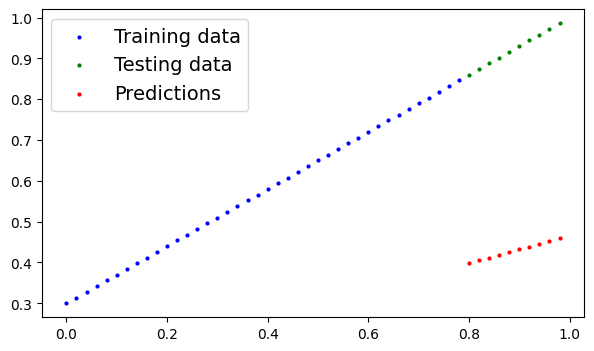

In [ ]:
plot_predictions(predictions=y_preds)
%time

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# 3. Train Model

- Hiện tại, model của chúng ta đang đưa ra dự đoán bằng cách sử dụng các tham số ngẫu nhiên để thực hiện các phép tính, nó cơ bản là đang đoán (một cách ngẫu nhiên).

- Để khắc phục điều đó, chúng ta có thể cập nhật các tham số bên trong của nó, các giá trị weight và bias mà ta thiết lập ngẫu nhiên bằng cách sử dụng nn.Parameter() và torch.randn() để trở thành điều gì đó tốt hơn để thể hiện dữ liệu.

- Chúng ta có thể mã hóa cứng điều này (vì chúng ta biết các giá trị mặc định là weight=0.7 và bias=0.3)

- Phần lớn thời gian, bạn sẽ không biết các tham số lý tưởng cho một mô hình là gì.

- Thay vào đó, viết mã để xem liệu mô hình có thể tự tìm ra chúng hay không thì thú vị hơn nhiều.

In [ ]:
# Tạo hàm mất mát (loss function)
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Tạo hàm tối ưu
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.001) # lr = learning rate : tỉ lệ học của máy 0.01 -> 0.001 -> 0.0001, càng nhỏ càng chính xác(đừng nhỏ quá)


# PyTorch training loop
1.   Forward pass - Model sẽ chạy thẳng qua các training data - `model(x_train)`
2.   Tính toán mất mát - Output của model(dự đoán) sẽ đem so sánh với bản gốc và chỉ ra sai số bao nhiêu - `loss = loss_fn(y_pred, y_train)`
3.   Zero grad - Cài đặt gradient = 0 sau mỗi vòng lặp - `optimizer.zero_grad()`
4.   Lan truyền ngược lỗi - Tính toán gradient của hàm mất mát theo từng tham số trong mô hình, tức là gradient của lỗi với mỗi tham số để cập nhật các tham số của mô hình. Đây là quá trình backpropagation - `loss.backward()`
5.   Cập nhật optimizer (gradient descent) - Cập nhật các tham số của mô hình (có requires_grad=True) theo gradient tính được trong bước trước, nhằm giảm thiểu lỗi và cải thiện mô hình - `optimizer.step()`



# 4. Tạo dự đoán với PyTorch model

In [ ]:
torch.manual_seed(42)

# Số lần model thực hiện training
epochs = 300

# Tạo danh sáng hàm mất mát trống để đếm dl
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    model_0.train()                     # Put model in training mode

    y_pred = model_0(X_train)           # 1. Forward pass on train data using the forward() method inside
    # print(y_pred)

    loss = loss_fn(y_pred, y_train)     # 2. Calculate the loss (how different are our models predictions to the ground truth)

    optimizer.zero_grad()               # 3. Zero grad of the optimizer

    loss.backward()                     # 4. Loss backwards

    optimizer.step()                    # 5. Progress the optimizer

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Cho đi qua test data
      test_pred = model_0(X_test)

      # 2. Tính toán mất mát dựa trên test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))


      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 10 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 20 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 30 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 40 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 50 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 60 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 70 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 80 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 90 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 100 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 110

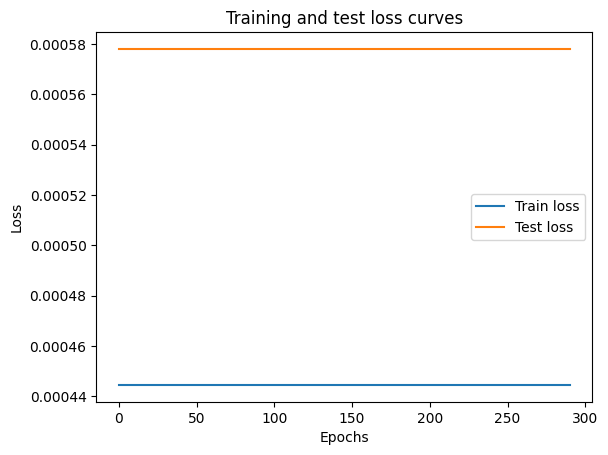

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Tạo dự đoán với model (again)
with torch.inference_mode():
    y_preds = model_0(X_test)


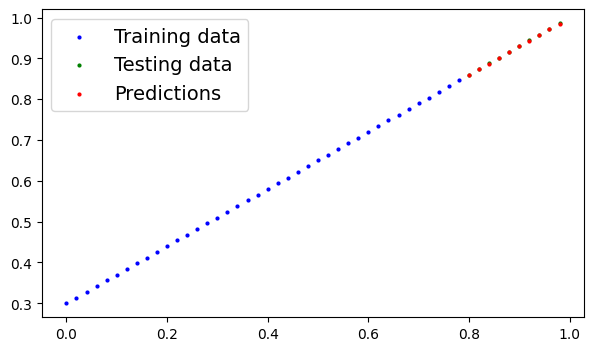

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
print("Dự đoán của model về trọng số (weight) và nhiễu (bias):")
print(model_0.state_dict())
print("\nGiá trị gốc của weight và bias:")
print(f"weights: {weight}, bias: {bias}")

Dự đoán của model về trọng số (weight) và nhiễu (bias):
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

Giá trị gốc của weight và bias:
weights: 0.7, bias: 0.3


# 5. Lưu và load PyTorch model

In [ ]:
from pathlib import Path

# 1. Tạo nơi ở cho model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check save path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Dec 13 04:31 models/01_pytorch_workflow_model_0.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()


loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-101-fc329411c36b>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
# 1. Đặt mô hình qua chế độ đánh giá
loaded_model_0.eval()

# 2. Dùng inference_mode để tạo dự đoán
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [ ]:
# So sánh dự đoán model lúc trước và model vừa mới load
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda
